In [121]:
#Importing all the required libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from nltk.stem import PorterStemmer

In [122]:
from zipfile import ZipFile
with ZipFile('smsspamcollection.zip') as z:
    z.extractall()

In [123]:
#reading the sms
with open('SMSSpamCollection', 'r') as f:
    msg = f.readlines()
print(len(msg))

5574


In [124]:
#converting the list of messages into a dataframe
msg_df = pd.read_csv("SMSSpamCollection", sep='\t',names =['Label','Message'])
msg_df.tail()

,Label,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [125]:
msg_df.to_csv('raw_data.csv')

<AxesSubplot: xlabel='Label', ylabel='count'>

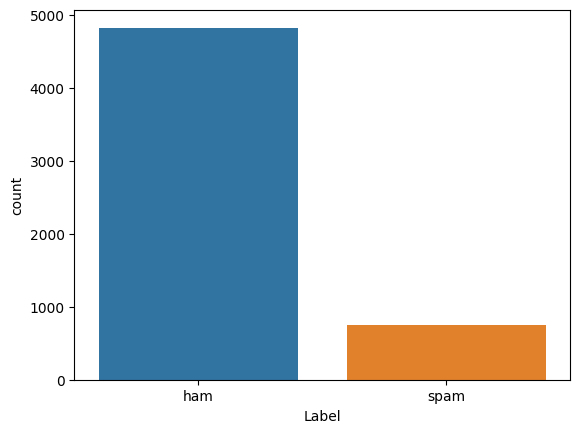

In [126]:
#looking at the imbalanced data
sns.countplot(x="Label", data=msg_df)

In [127]:
#Creating a column for the length of messages
msg_len =[]
for i in range(len(msg_df)):
    msg_len.append(len(msg_df['Message'][i]))
msg_df['Message_Length'] = msg_len

msg_df.Label.replace("spam", 1, inplace=True)
msg_df.Label.replace("ham", 0, inplace=True)

In [128]:
msg_df.head()

,Label,Message,Message_Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [129]:
#statistics about the length of messages
msg_df.groupby('Label').describe()

Message_Length                                                         
               count        mean        std   min    25%    50%    75%    max
Label                                                                        
0             4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
1              747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

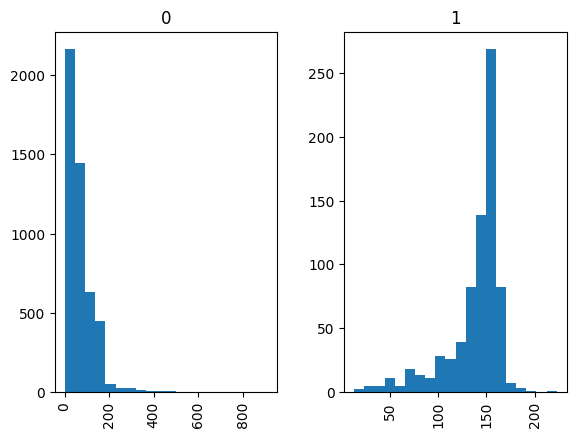

In [130]:
#Plotting the varied length of sentences
msg_df.hist(column='Message_Length', by='Label', bins=20)

In [131]:
#splitting the data into train, validate and test data
X_train, X_test, y_train, y_test = train_test_split(msg_df['Message'], msg_df['Label'], test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

The number of 0's and 1's in train.csv are:2874 and 468 


(array([2874.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         468.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

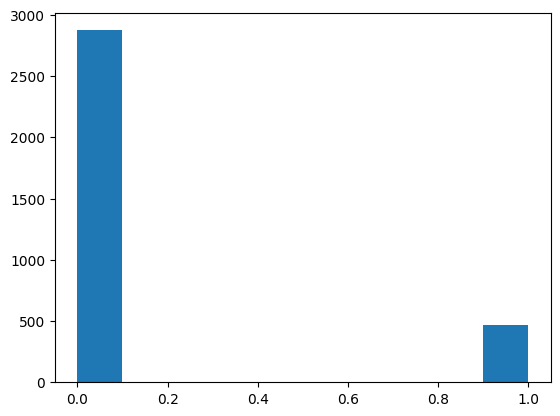

In [132]:
train1 = sum(y_train==1)
train0 = sum(y_train==0)
print(f"The number of 0's and 1's in train.csv are:{train0} and {train1} ")
from matplotlib import pyplot as plt
plt.hist(y_train)

The number of 0's and 1's in train.csv are :972 and 143 


(array([972.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

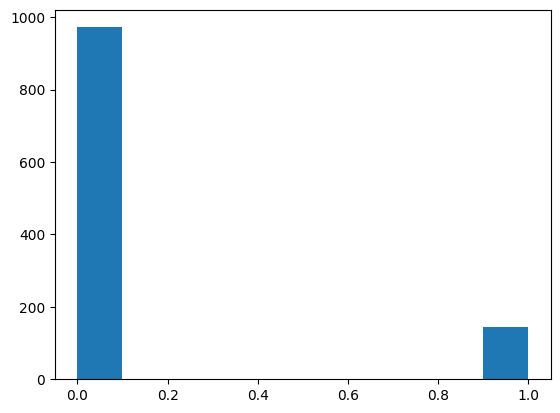

In [133]:
test1 = sum(y_test==1)
test0 = sum(y_test==0)
print(f"The number of 0's and 1's in train.csv are :{test0} and {test1} ")
from matplotlib import pyplot as plt
plt.hist(y_test)

The number of 0's and 1's in train.csv are :979 and 136 


(array([979.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 136.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

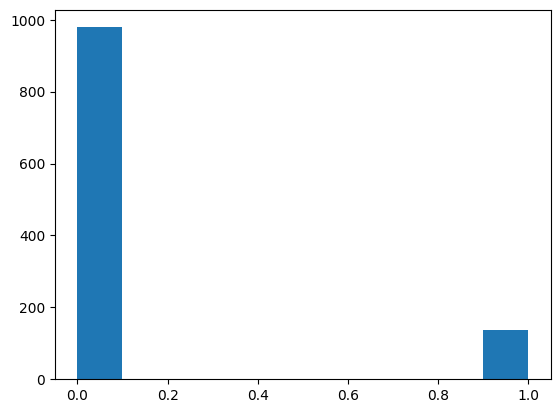

In [134]:
validation1 = sum(y_val==1)
validation0 = sum(y_val==0)
print(f"The number of 0's and 1's in train.csv are :{validation0} and {validation1} ")
from matplotlib import pyplot as plt
plt.hist(y_val)

In [135]:
#creating and saving a dataframe of train data
train_dict = {'Message': X_train, "Label": y_train}
train_df = pd.DataFrame(train_dict)
train_df.to_csv('train.csv')

In [136]:
#creating and saving a dataframe of validation data
val_dict = {'Message': X_val, "Label": y_val}
val_df = pd.DataFrame(val_dict)
val_df.to_csv('validation.csv')

In [137]:
#creating and saving a dataframe of test data
test_dict = {'Message': X_test, "Label": y_test}
test_df = pd.DataFrame(test_dict)
test_df.to_csv('test.csv')